In [1]:
import pandas as pd

In [2]:
!pip install pyarrow

In [2]:
parquet_train = "/home/cbelshe/CMPE-258/final_project/train.parquet"
train_df = pd.read_parquet(parquet_train)

In [4]:
train_df.head()

,id,channel_1,channel_10,channel_11,channel_12,channel_13,channel_14,channel_15,channel_16,channel_17,...,telecommand_351,telecommand_352,telecommand_353,telecommand_354,telecommand_36,telecommand_376,telecommand_38,telecommand_39,telecommand_40,is_anomaly
0,0,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,3,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,4,0.13791,0.0,0.0,0.317175,0.371764,0.297205,0.130113,0.766769,0.349474,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [5]:
len(train_df)

14728321

In [7]:
(train_df["is_anomaly"] != 0).sum()

np.int64(1544104)

In [15]:
max(train_df['is_anomaly'])

1

In [8]:
parquet_test = "/home/cbelshe/CMPE-258/final_project/test.parquet"
test_df = pd.read_parquet(parquet_test)

In [10]:
len(test_df)

521280

In [12]:
train_df.columns

Index(['id', 'channel_1', 'channel_10', 'channel_11', 'channel_12',
       'channel_13', 'channel_14', 'channel_15', 'channel_16', 'channel_17',
       'channel_18', 'channel_19', 'channel_2', 'channel_20', 'channel_21',
       'channel_22', 'channel_23', 'channel_24', 'channel_25', 'channel_26',
       'channel_27', 'channel_28', 'channel_29', 'channel_3', 'channel_30',
       'channel_31', 'channel_32', 'channel_33', 'channel_34', 'channel_35',
       'channel_36', 'channel_37', 'channel_38', 'channel_39', 'channel_4',
       'channel_40', 'channel_41', 'channel_42', 'channel_43', 'channel_44',
       'channel_45', 'channel_46', 'channel_47', 'channel_48', 'channel_49',
       'channel_5', 'channel_50', 'channel_51', 'channel_52', 'channel_53',
       'channel_54', 'channel_55', 'channel_56', 'channel_57', 'channel_58',
       'channel_59', 'channel_6', 'channel_60', 'channel_61', 'channel_62',
       'channel_63', 'channel_64', 'channel_65', 'channel_66', 'channel_67',
       'chann

In [14]:
len(train_df.columns), len(test_df.columns) # just confirming the only col test is lacking is the anomaly one

(89, 88)

## plot a few channels

/tmp/ipykernel_166831/4025655123.py:25: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  axes[idx].set_ylim(df_subset[channel].min() - 0.1*y_range,


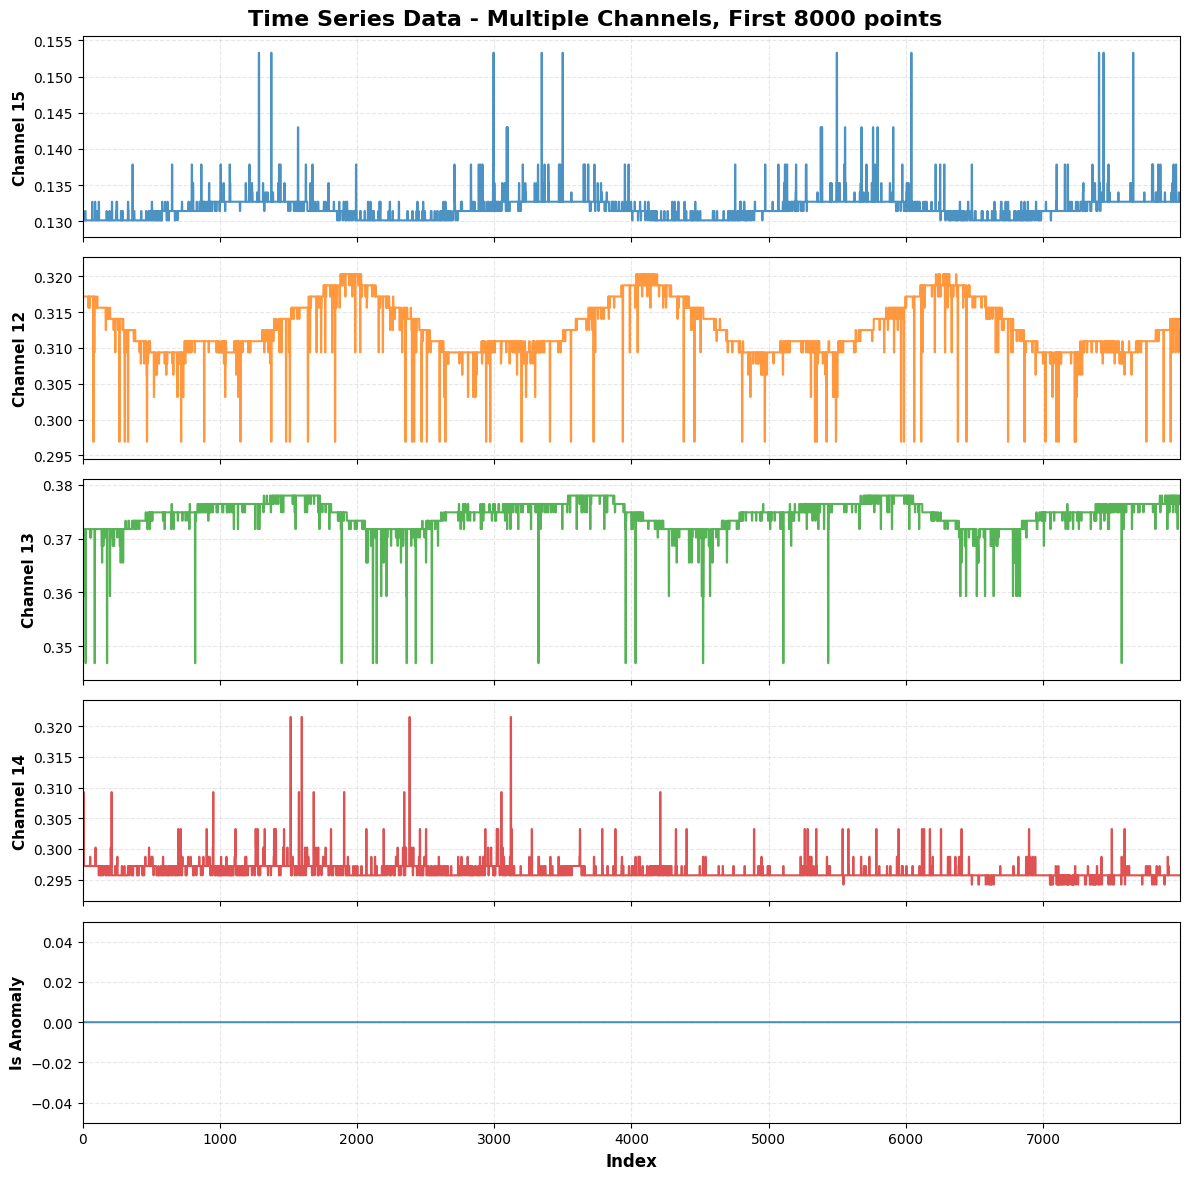

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

n_points = 8000
df_subset = train_df.head(n_points)

# Plot each channel
channels = ['channel_15', 'channel_12', 'channel_13', 'channel_14', 'is_anomaly']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Set up the plot
fig, axes = plt.subplots(len(channels), 1, figsize=(12, 12), sharex=True)
fig.suptitle(f'Time Series Data - Multiple Channels, First {n_points} points', fontsize=16, fontweight='bold')


# Plot each channel
for idx, channel in enumerate(channels):
    color = colors[idx % len(colors)]
    axes[idx].plot(df_subset.index, df_subset[channel], color=color, linewidth=1.5, alpha=0.8)
    axes[idx].set_ylabel(channel.replace('_', ' ').title(), fontsize=11, fontweight='bold')
    axes[idx].grid(True, alpha=0.3, linestyle='--')
    
    # Add some padding to y-axis
    y_range = df_subset[channel].max() - df_subset[channel].min()
    axes[idx].set_ylim(df_subset[channel].min() - 0.1*y_range, 
                       df_subset[channel].max() + 0.1*y_range)

# Format x-axis
axes[-1].set_xlabel('Index', fontsize=12, fontweight='bold')
axes[-1].set_xlim(0, n_points - 1)

# Adjust layout
plt.tight_layout()

# Adjust layout
plt.tight_layout()
plt.show()


## Simple perceptron NN

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                             confusion_matrix, roc_curve, auc)
import seaborn as sns
import numpy as np

In [27]:
channels_to_use_file = "/home/cbelshe/CMPE-258/final_project/target_channels.csv"
channels = pd.read_csv(channels_to_use_file)
channels = list(channels["target_channels"])

In [29]:
X = train_df[channels].values
y = train_df["is_anomaly"].values

In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
) # don't need a val set since this is a basic test for now

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
mlp = MLPClassifier(
    hidden_layer_sizes=(64, 32),  # Two hidden layers: 64 and 32 neurons
    # hidden_layer_sizes=(128,64,64,32),
    activation='relu',             # ReLU activation function
    solver='adam',                 # Adam optimizer
    max_iter=500,                  # Maximum iterations
    random_state=42,
    early_stopping=True,           # Stop if validation score doesn't improve
    validation_fraction=0.1,       # Use 10% of training data for validation
    verbose=True
)

In [40]:
mlp.fit(X_train_scaled, y_train)

Iteration 1, loss = 0.06616437
Validation score: 0.985380
Iteration 2, loss = 0.04443414
Validation score: 0.987390
Iteration 3, loss = 0.03913754
Validation score: 0.988029
Iteration 4, loss = 0.03628321
Validation score: 0.988833
Iteration 5, loss = 0.03428863
Validation score: 0.988001
Iteration 6, loss = 0.03288069
Validation score: 0.989653
Iteration 7, loss = 0.03176805
Validation score: 0.990676
Iteration 8, loss = 0.03093547
Validation score: 0.990611
Iteration 9, loss = 0.03014055
Validation score: 0.990433
Iteration 10, loss = 0.02948647
Validation score: 0.990018
Iteration 11, loss = 0.02904877
Validation score: 0.989929
Iteration 12, loss = 0.02856918
Validation score: 0.990915
Iteration 13, loss = 0.02819091
Validation score: 0.990411
Iteration 14, loss = 0.02781252
Validation score: 0.991250
Iteration 15, loss = 0.02748586
Validation score: 0.989440
Iteration 16, loss = 0.02714897
Validation score: 0.990916
Iteration 17, loss = 0.02691037
Validation score: 0.992028
Iterat

,hidden_layer_sizes,"(64, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


In [41]:
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)
y_test_proba = mlp.predict_proba(X_test_scaled)[:, 1]

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"  Training accuracy: {train_accuracy:.4f}")
print(f"  Testing accuracy:  {test_accuracy:.4f}")

  Training accuracy: 0.9924
  Testing accuracy:  0.9922


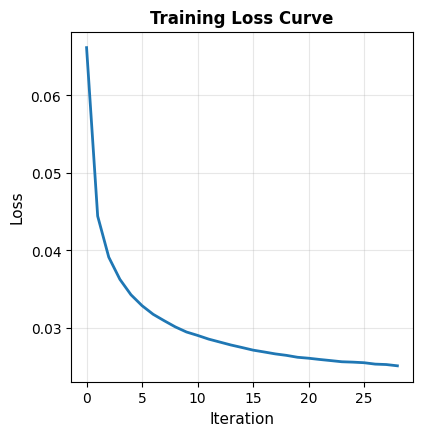

In [42]:
# Create visualizations
fig = plt.figure(figsize=(15, 10))

# 1. Training Loss Curve
ax1 = plt.subplot(2, 3, 1)
plt.plot(mlp.loss_curve_, linewidth=2)
plt.xlabel('Iteration', fontsize=11)
plt.ylabel('Loss', fontsize=11)
plt.title('Training Loss Curve', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

Text(0.5, 1.0, 'Confusion Matrix (Test Set)')

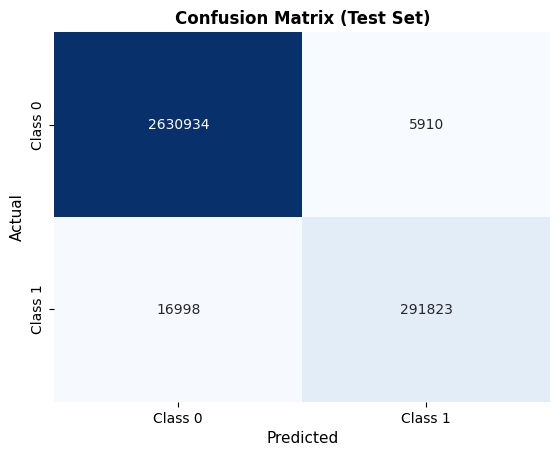

In [45]:
# 2. Confusion Matrix
# ax2 = plt.subplot(2, 3, 2)
plt.figure()
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted', fontsize=11)
plt.ylabel('Actual', fontsize=11)
plt.title('Confusion Matrix (Test Set)', fontsize=12, fontweight='bold')

Based on the confusion matrix, this model is not doing nearly as well as the accuracy makes it appear - since the majority of the points are not anomalous, the data is very skewed.

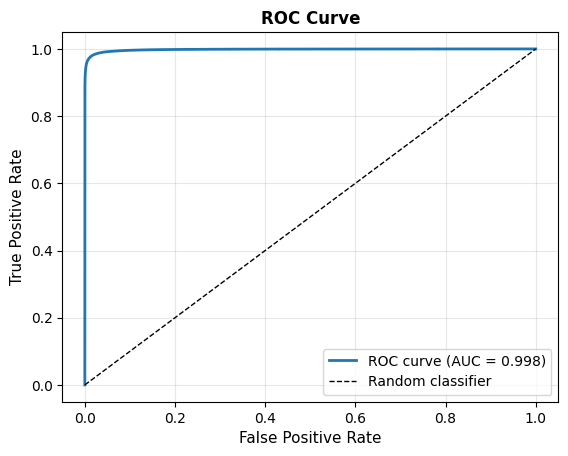

In [46]:
# 3. ROC Curve
# ax3 = plt.subplot(2, 3, 3)
plt.figure()
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, linewidth=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random classifier')
plt.xlabel('False Positive Rate', fontsize=11)
plt.ylabel('True Positive Rate', fontsize=11)
plt.title('ROC Curve', fontsize=12, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)

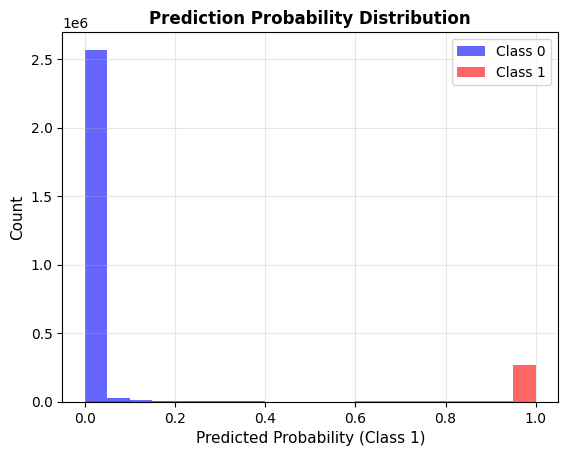

In [48]:
# 4. Prediction Probabilities Distribution
plt.figure()
plt.hist(y_test_proba[y_test == 0], bins=20, alpha=0.6, label='Class 0', color='blue')
plt.hist(y_test_proba[y_test == 1], bins=20, alpha=0.6, label='Class 1', color='red')
plt.xlabel('Predicted Probability (Class 1)', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Prediction Probability Distribution', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

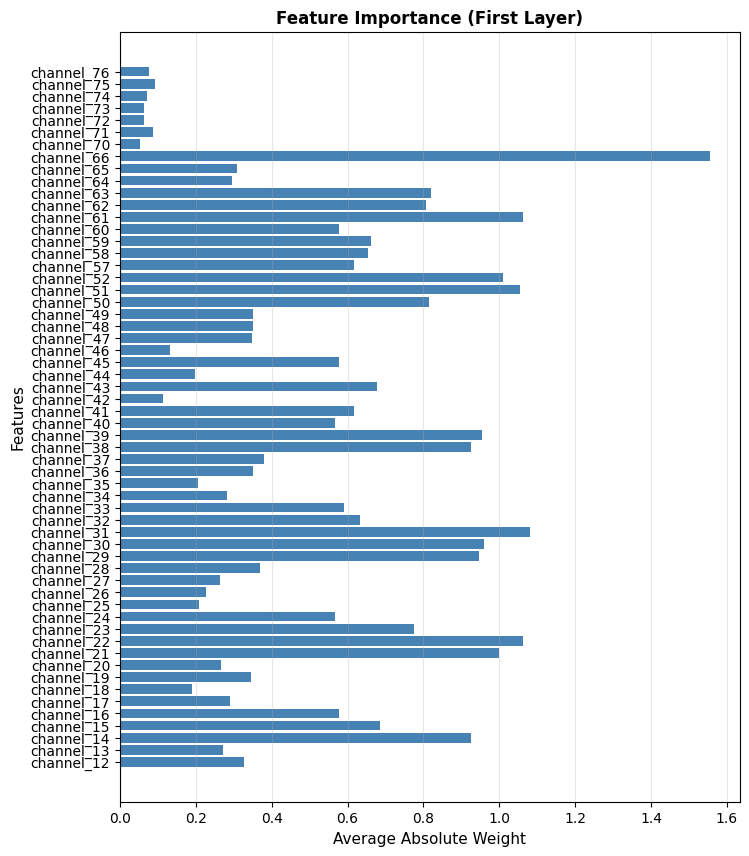

In [52]:
# 5. Feature Importance (via weight magnitudes from first layer)
plt.figure(figsize=(8, 10))
first_layer_weights = np.abs(mlp.coefs_[0]).mean(axis=1)
plt.barh(channels, first_layer_weights, color='steelblue')
plt.xlabel('Average Absolute Weight', fontsize=11)
plt.ylabel('Features', fontsize=11)
plt.title('Feature Importance (First Layer)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

In [55]:
plt.close()

## LSTM

In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import os

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

In [4]:
class TimeSeriesDataset(Dataset):
    """Custom Dataset for timeseries data"""
    def __init__(self, features, labels, sequence_length=50):
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels)
        self.sequence_length = sequence_length
        
    def __len__(self):
        return len(self.features) - self.sequence_length + 1
    
    def __getitem__(self, idx):
        # Get sequence of features
        x = self.features[idx:idx + self.sequence_length]
        # Get label for the last timestep in sequence
        y = self.labels[idx + self.sequence_length - 1]
        return x, y

In [5]:
class LSTMClassifier(nn.Module):
    """LSTM model for binary classification of timeseries data"""
    def __init__(self, input_size, hidden_size=128, num_layers=2, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layers
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout if num_layers > 1 else 0,
            batch_first=True
        )
        
        # Fully connected layers
        self.fc1 = nn.Linear(hidden_size, 64)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.fc2 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # LSTM forward pass
        lstm_out, (hidden, cell) = self.lstm(x)
        
        # Use the last output
        out = lstm_out[:, -1, :]
        
        # Fully connected layers
        out = self.fc1(out)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        out = self.sigmoid(out)
        
        return out

In [14]:
# def load_and_split_data(parquet_path, train_ratio=0.7, val_ratio=0.15, sequence_length=50):
def load_and_split_data(df, train_ratio=0.7, val_ratio=0.15, sequence_length=50):
    """
    Load parquet file and split into train/val/test sets
    Uses continuous time segments for splitting
    """
    # print("Loading data from parquet file...")
    # df = pd.read_parquet(parquet_path)
    
    print(f"Data shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    
    # Separate features and labels
    if 'is_anomaly' not in df.columns:
        raise ValueError("'is_anomaly' column not found in the dataframe")
    
    # Get feature columns (all except truth)
    # might want to reduce this to only using the recommended ones rather than all ?
    feature_cols = [col for col in df.columns if col != 'is_anomaly']
    
    print(f"Number of feature channels: {len(feature_cols)}")
    print(f"Class distribution: {df['is_anomaly'].value_counts().to_dict()}")
    
    # Convert to numpy arrays
    features = df[feature_cols].values
    labels = df['is_anomaly'].values
    
    # Calculate split indices for continuous segments
    n_samples = len(df)
    train_end = int(n_samples * train_ratio)
    val_end = int(n_samples * (train_ratio + val_ratio))
    
    print(f"\nSplit sizes:")
    print(f"Train: 0 to {train_end} ({train_ratio*100}%)")
    print(f"Val: {train_end} to {val_end} ({val_ratio*100}%)")
    print(f"Test: {val_end} to {n_samples} ({(1-train_ratio-val_ratio)*100}%)")
    
    # Split data into continuous segments
    train_features = features[:train_end]
    train_labels = labels[:train_end]
    
    val_features = features[train_end:val_end]
    val_labels = labels[train_end:val_end]
    
    test_features = features[val_end:]
    test_labels = labels[val_end:]
    
    # Create datasets
    train_dataset = TimeSeriesDataset(train_features, train_labels, sequence_length)
    val_dataset = TimeSeriesDataset(val_features, val_labels, sequence_length)
    test_dataset = TimeSeriesDataset(test_features, test_labels, sequence_length)
    
    return train_dataset, val_dataset, test_dataset, len(feature_cols)

In [7]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs, device):
    """Train the LSTM model"""
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    
    best_val_loss = float('inf')
    best_model_state = None
    
    print("\nStarting training...\n")
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.unsqueeze(1)
            
            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass
            loss.backward()
            optimizer.step()
            
            # Statistics
            train_loss += loss.item()
            predicted = (outputs > 0.5).float()
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            
            if (batch_idx + 1) % 50 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}")
        
        # Calculate training metrics
        avg_train_loss = train_loss / len(train_loader)
        train_acc = 100 * train_correct / train_total
        train_losses.append(avg_train_loss)
        train_accs.append(train_acc)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                labels = labels.unsqueeze(1)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                predicted = (outputs > 0.5).float()
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
        
        # Calculate validation metrics
        avg_val_loss = val_loss / len(val_loader)
        val_acc = 100 * val_correct / val_total
        val_losses.append(avg_val_loss)
        val_accs.append(val_acc)
        
        print(f"\nEpoch [{epoch+1}/{num_epochs}]")
        print(f"Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%\n")
        
        # Save best model
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            best_model_state = model.state_dict().copy()
            print(f"New best model saved with val loss: {best_val_loss:.4f}\n")
    
    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
    
    return model, train_losses, val_losses, train_accs, val_accs

In [22]:
def evaluate_model(model, test_loader, device):
    """Evaluate model on test set"""
    model.eval()
    all_labels = []
    all_predictions = []
    all_probs = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            predicted = (outputs > 0.5).float()
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_probs.extend(outputs.cpu().numpy())
    
    all_labels = np.array(all_labels)
    all_predictions = np.array(all_predictions).flatten()
    all_probs = np.array(all_probs).flatten()
    
    # Calculate metrics
    test_acc = 100 * (all_predictions == all_labels).sum() / len(all_labels)
    
    print("\n" + "="*60)
    print("TEST SET RESULTS")
    print("="*60)
    print(f"\nTest Accuracy: {test_acc:.2f}%\n")
    print("Classification Report:")
    print(classification_report(all_labels, all_predictions, target_names=['No Event', 'Event']))
    
    return all_labels, all_predictions, all_probs


def visualize_results(train_losses, val_losses, train_accs, val_accs, 
                     true_labels, predictions, probs, output_dir='/home/cbelshe/CMPE-258/final_project/results'):
    """Create comprehensive visualizations of model performance"""
    
    os.makedirs(output_dir, exist_ok=True)
    
    # Set style
    sns.set_style("whitegrid")
    
    # 1. Training History
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Loss plot
    axes[0].plot(train_losses, label='Train Loss', linewidth=2)
    axes[0].plot(val_losses, label='Validation Loss', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # Accuracy plot
    axes[1].plot(train_accs, label='Train Accuracy', linewidth=2)
    axes[1].plot(val_accs, label='Validation Accuracy', linewidth=2)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy (%)', fontsize=12)
    axes[1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/training_history.png', dpi=300, bbox_inches='tight')
    print(f"Saved: {output_dir}/training_history.png")
    plt.close()
    
    # 2. Confusion Matrix
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Event', 'Event'],
                yticklabels=['No Event', 'Event'],
                cbar_kws={'label': 'Count'})
    plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/confusion_matrix.png', dpi=300, bbox_inches='tight')
    print(f"Saved: {output_dir}/confusion_matrix.png")
    plt.close()
    
    # 3. ROC Curve
    fpr, tpr, _ = roc_curve(true_labels, probs)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right", fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/roc_curve.png', dpi=300, bbox_inches='tight')
    print(f"Saved: {output_dir}/roc_curve.png")
    plt.close()
    
    # 4. Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(true_labels, probs)
    pr_auc = auc(recall, precision)
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2,
             label=f'PR curve (AUC = {pr_auc:.3f})')
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
    plt.legend(loc="lower left", fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/precision_recall_curve.png', dpi=300, bbox_inches='tight')
    print(f"Saved: {output_dir}/precision_recall_curve.png")
    plt.close()
    
    # 5. Prediction Distribution
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram of probabilities by true class
    axes[0].hist(probs[true_labels == 0], bins=50, alpha=0.6, label='No Event (True)', color='blue')
    axes[0].hist(probs[true_labels == 1], bins=50, alpha=0.6, label='Event (True)', color='red')
    axes[0].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')
    axes[0].set_xlabel('Predicted Probability', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Distribution of Predicted Probabilities', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # Time series of predictions (sample)
    sample_size = min(1000, len(predictions))
    sample_idx = np.random.choice(len(predictions), sample_size, replace=False)
    sample_idx = np.sort(sample_idx)
    
    axes[1].scatter(range(sample_size), true_labels[sample_idx], 
                   alpha=0.3, s=10, label='True Labels', color='green')
    axes[1].scatter(range(sample_size), probs[sample_idx], 
                   alpha=0.3, s=10, label='Predicted Probabilities', color='orange')
    axes[1].axhline(y=0.5, color='black', linestyle='--', linewidth=1, alpha=0.5)
    axes[1].set_xlabel('Time Index (sampled)', fontsize=12)
    axes[1].set_ylabel('Value', fontsize=12)
    axes[1].set_title('Sample of Predictions vs True Labels', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/prediction_distribution.png', dpi=300, bbox_inches='tight')
    print(f"Saved: {output_dir}/prediction_distribution.png")
    plt.close()
    
    print(f"\nAll visualizations saved to '{output_dir}/' directory")

In [25]:
SEQUENCE_LENGTH = 50  # Number of timesteps in each sequence
# BATCH_SIZE = 64
BATCH_SIZE=256
HIDDEN_SIZE = 128
NUM_LAYERS = 2
DROPOUT = 0.3
LEARNING_RATE = 0.001
NUM_EPOCHS = 5

# Check CUDA availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory Allocated: {torch.cuda.memory_allocated(0) / 1024**2:.2f} MB")
print()

# Load and split data
train_dataset, val_dataset, test_dataset, input_size = load_and_split_data(
    train_df, 
    train_ratio=0.9,
    val_ratio=0.05, # use relatively small test / val sets since we have a lot of data
    sequence_length=SEQUENCE_LENGTH
)

Using device: cuda
GPU: NVIDIA GB10
Memory Allocated: 22.03 MB

Data shape: (14728321, 89)
Columns: ['id', 'channel_1', 'channel_10', 'channel_11', 'channel_12', 'channel_13', 'channel_14', 'channel_15', 'channel_16', 'channel_17', 'channel_18', 'channel_19', 'channel_2', 'channel_20', 'channel_21', 'channel_22', 'channel_23', 'channel_24', 'channel_25', 'channel_26', 'channel_27', 'channel_28', 'channel_29', 'channel_3', 'channel_30', 'channel_31', 'channel_32', 'channel_33', 'channel_34', 'channel_35', 'channel_36', 'channel_37', 'channel_38', 'channel_39', 'channel_4', 'channel_40', 'channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46', 'channel_47', 'channel_48', 'channel_49', 'channel_5', 'channel_50', 'channel_51', 'channel_52', 'channel_53', 'channel_54', 'channel_55', 'channel_56', 'channel_57', 'channel_58', 'channel_59', 'channel_6', 'channel_60', 'channel_61', 'channel_62', 'channel_63', 'channel_64', 'channel_65', 'channel_66', 'channel_67', 'ch

In [30]:
print(device)

cuda


In [26]:
# get torch data loaders
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"\nDataLoader sizes:")
print(f"Train batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")


DataLoader sizes:
Train batches: 51780
Val batches: 2877
Test batches: 2877


In [34]:
# Initialize model
model = LSTMClassifier(
    input_size=input_size,
    hidden_size=HIDDEN_SIZE,
    num_layers=NUM_LAYERS,
    dropout=DROPOUT
).to(device)

print(f"\nModel Architecture:")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters()):,}")

# Loss and optimizer
# criterion = nn.BCELoss()
num_class_0 = train_df['is_anomaly'].value_counts()[0]
num_class_1 = train_df['is_anomaly'].value_counts()[1]
pos_weight_tensor = torch.tensor([num_class_0 / num_class_1], dtype=torch.float32)
print(pos_weight_tensor)
criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight_tensor.to(device))
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)


Model Architecture:
LSTMClassifier(
  (lstm): LSTM(88, 128, num_layers=2, batch_first=True, dropout=0.3)
  (fc1): Linear(in_features=128, out_features=64, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.3, inplace=False)
  (fc2): Linear(in_features=64, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

Total parameters: 252,033
tensor([8.5384])


In [35]:
# Train model
model, train_losses, val_losses, train_accs, val_accs = train_model(
    model, train_loader, val_loader, criterion, optimizer, NUM_EPOCHS, device
)


Starting training...

Epoch [1/5], Batch [50/51780], Loss: 1.1442
Epoch [1/5], Batch [100/51780], Loss: 1.3459
Epoch [1/5], Batch [150/51780], Loss: 1.1217
Epoch [1/5], Batch [200/51780], Loss: 1.1831
Epoch [1/5], Batch [250/51780], Loss: 1.2646
Epoch [1/5], Batch [300/51780], Loss: 1.1834
Epoch [1/5], Batch [350/51780], Loss: 1.0607
Epoch [1/5], Batch [400/51780], Loss: 1.0200
Epoch [1/5], Batch [450/51780], Loss: 1.2443
Epoch [1/5], Batch [500/51780], Loss: 1.2646
Epoch [1/5], Batch [550/51780], Loss: 1.2850
Epoch [1/5], Batch [600/51780], Loss: 1.2851
Epoch [1/5], Batch [650/51780], Loss: 1.1014
Epoch [1/5], Batch [700/51780], Loss: 1.0811
Epoch [1/5], Batch [750/51780], Loss: 1.2852
Epoch [1/5], Batch [800/51780], Loss: 1.2850
Epoch [1/5], Batch [850/51780], Loss: 1.2239
Epoch [1/5], Batch [900/51780], Loss: 1.1015
Epoch [1/5], Batch [950/51780], Loss: 1.4075
Epoch [1/5], Batch [1000/51780], Loss: 1.2851
Epoch [1/5], Batch [1050/51780], Loss: 1.2850
Epoch [1/5], Batch [1100/51780]

In [36]:
# Evaluate on test set
true_labels, predictions, probs = evaluate_model(model, test_loader, device)

# Visualize results
visualize_results(train_losses, val_losses, train_accs, val_accs,
                 true_labels, predictions, probs)


TEST SET RESULTS

Test Accuracy: 79.82%

Classification Report:
              precision    recall  f1-score   support

    No Event       0.80      1.00      0.89    587742
       Event       0.00      0.00      0.00    148626

    accuracy                           0.80    736368
   macro avg       0.40      0.50      0.44    736368
weighted avg       0.64      0.80      0.71    736368



/home/cbelshe/jupyterlab/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cbelshe/jupyterlab/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/cbelshe/jupyterlab/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

Saved: /home/cbelshe/CMPE-258/final_project/results/training_history.png
Saved: /home/cbelshe/CMPE-258/final_project/results/confusion_matrix.png
Saved: /home/cbelshe/CMPE-258/final_project/results/roc_curve.png
Saved: /home/cbelshe/CMPE-258/final_project/results/precision_recall_curve.png
Saved: /home/cbelshe/CMPE-258/final_project/results/prediction_distribution.png

All visualizations saved to '/home/cbelshe/CMPE-258/final_project/results/' directory


## LSTM take 2

In [41]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, WeightedRandomSampler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import os

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

class TimeSeriesDataset(Dataset):
    """Custom Dataset for timeseries data"""
    def __init__(self, features, labels, sequence_length=50):
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels)
        self.sequence_length = sequence_length
        
    def __len__(self):
        return len(self.features) - self.sequence_length + 1
    
    def __getitem__(self, idx):
        # Get sequence of features
        x = self.features[idx:idx + self.sequence_length]
        # Get label for the last timestep in sequence
        y = self.labels[idx + self.sequence_length - 1]
        return x, y
    
    def get_labels(self):
        """Return all labels for weighted sampling"""
        return [self.labels[i + self.sequence_length - 1].item() 
                for i in range(len(self))]


class LSTMClassifier(nn.Module):
    """LSTM model for binary classification of timeseries data"""
    def __init__(self, input_size, hidden_size=128, num_layers=2, dropout=0.3):
        super(LSTMClassifier, self).__init__()
        
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM layers
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout if num_layers > 1 else 0,
            batch_first=True,
            bidirectional=True  # Bidirectional for better context
        )
        
        # Fully connected layers (note: *2 for bidirectional)
        self.fc1 = nn.Linear(hidden_size * 2, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout)
        
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(dropout)
        
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        # LSTM forward pass
        lstm_out, (hidden, cell) = self.lstm(x)
        
        # Use the last output
        out = lstm_out[:, -1, :]
        
        # Fully connected layers
        out = self.fc1(out)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.dropout1(out)
        
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu(out)
        out = self.dropout2(out)
        
        out = self.fc3(out)
        out = self.sigmoid(out)
        
        return out


class FocalLoss(nn.Module):
    """
    Focal Loss for addressing class imbalance
    Focuses training on hard examples
    """
    def __init__(self, alpha=0.25, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        
    def forward(self, inputs, targets):
        bce_loss = nn.functional.binary_cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-bce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * bce_loss
        return focal_loss.mean()


def load_and_split_data(df, train_ratio=0.7, val_ratio=0.15, sequence_length=50):
    """
    Load parquet file and split into train/val/test sets
    Uses continuous time segments for splitting
    """
    print("Loading data from parquet file...")
    # df = pd.read_parquet(parquet_path)
    
    print(f"Data shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    
    # Separate features and labels
    if 'is_anomaly' not in df.columns:
        raise ValueError("'is_anomaly' column not found in the dataframe")
    
    # Get feature columns (all except truth)
    feature_cols = [col for col in df.columns if col != 'is_anomaly']
    
    print(f"Number of feature channels: {len(feature_cols)}")
    print(f"Class distribution: {df['is_anomaly'].value_counts().to_dict()}")
    
    # Convert to numpy arrays
    features = df[feature_cols].values
    labels = df['is_anomaly'].values
    
    # NORMALIZE FEATURES - Critical for LSTM training
    from sklearn.preprocessing import StandardScaler
    scaler = StandardScaler()
    features = scaler.fit_transform(features)
    print("\n✓ Features normalized (StandardScaler)")
    
    # Calculate split indices for continuous segments
    n_samples = len(df)
    train_end = int(n_samples * train_ratio)
    val_end = int(n_samples * (train_ratio + val_ratio))
    
    print(f"\nSplit sizes:")
    print(f"Train: 0 to {train_end} ({train_ratio*100}%)")
    print(f"Val: {train_end} to {val_end} ({val_ratio*100}%)")
    print(f"Test: {val_end} to {n_samples} ({(1-train_ratio-val_ratio)*100}%)")
    
    # Split data into continuous segments
    train_features = features[:train_end]
    train_labels = labels[:train_end]
    
    val_features = features[train_end:val_end]
    val_labels = labels[train_end:val_end]
    
    test_features = features[val_end:]
    test_labels = labels[val_end:]
    
    # Print class distribution in each split
    print(f"\nClass distribution in splits:")
    print(f"Train - Class 0: {np.sum(train_labels == 0)} ({100*np.mean(train_labels == 0):.2f}%), "
          f"Class 1: {np.sum(train_labels == 1)} ({100*np.mean(train_labels == 1):.2f}%)")
    print(f"Val   - Class 0: {np.sum(val_labels == 0)} ({100*np.mean(val_labels == 0):.2f}%), "
          f"Class 1: {np.sum(val_labels == 1)} ({100*np.mean(val_labels == 1):.2f}%)")
    print(f"Test  - Class 0: {np.sum(test_labels == 0)} ({100*np.mean(test_labels == 0):.2f}%), "
          f"Class 1: {np.sum(test_labels == 1)} ({100*np.mean(test_labels == 1):.2f}%)")
    
    # Create datasets
    train_dataset = TimeSeriesDataset(train_features, train_labels, sequence_length)
    val_dataset = TimeSeriesDataset(val_features, val_labels, sequence_length)
    test_dataset = TimeSeriesDataset(test_features, test_labels, sequence_length)
    
    # Calculate class weights for loss function
    pos_weight = np.sum(train_labels == 0) / np.sum(train_labels == 1)
    print(f"\nCalculated positive class weight: {pos_weight:.2f}")
    
    return train_dataset, val_dataset, test_dataset, len(feature_cols), pos_weight


def create_weighted_sampler(dataset):
    """
    Create a weighted sampler to balance classes during training
    """
    labels = dataset.get_labels()
    class_counts = np.bincount([int(l) for l in labels])
    
    # Weight inversely proportional to class frequency
    class_weights = 1.0 / class_counts
    sample_weights = [class_weights[int(label)] for label in labels]
    
    sampler = WeightedRandomSampler(
        weights=sample_weights,
        num_samples=len(sample_weights),
        replacement=True
    )
    
    print(f"✓ Created weighted sampler (Class 0 weight: {class_weights[0]:.4f}, "
          f"Class 1 weight: {class_weights[1]:.4f})")
    
    return sampler


def train_model(model, train_loader, val_loader, criterion, optimizer, scheduler, 
                num_epochs, device, patience=5):
    """Train the LSTM model with early stopping"""
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []
    train_f1s = []
    val_f1s = []
    
    best_val_f1 = 0.0
    best_model_state = None
    patience_counter = 0
    
    print("\nStarting training...\n")
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        train_correct = 0
        train_total = 0
        train_tp = 0
        train_fp = 0
        train_fn = 0
        
        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            labels = labels.unsqueeze(1)
            
            # Forward pass
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            # Backward pass
            loss.backward()
            # Gradient clipping to prevent exploding gradients
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            # Statistics
            train_loss += loss.item()
            predicted = (outputs > 0.5).float()
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            
            # F1 score components
            train_tp += ((predicted == 1) & (labels == 1)).sum().item()
            train_fp += ((predicted == 1) & (labels == 0)).sum().item()
            train_fn += ((predicted == 0) & (labels == 1)).sum().item()
            
            if (batch_idx + 1) % 50 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], "
                      f"Loss: {loss.item():.4f}")
        
        # Calculate training metrics
        avg_train_loss = train_loss / len(train_loader)
        train_acc = 100 * train_correct / train_total
        train_precision = train_tp / (train_tp + train_fp) if (train_tp + train_fp) > 0 else 0
        train_recall = train_tp / (train_tp + train_fn) if (train_tp + train_fn) > 0 else 0
        train_f1 = 2 * train_precision * train_recall / (train_precision + train_recall) if (train_precision + train_recall) > 0 else 0
        
        train_losses.append(avg_train_loss)
        train_accs.append(train_acc)
        train_f1s.append(train_f1)
        
        # Validation phase
        model.eval()
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        val_tp = 0
        val_fp = 0
        val_fn = 0
        
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                labels = labels.unsqueeze(1)
                
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                predicted = (outputs > 0.5).float()
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()
                
                # F1 score components
                val_tp += ((predicted == 1) & (labels == 1)).sum().item()
                val_fp += ((predicted == 1) & (labels == 0)).sum().item()
                val_fn += ((predicted == 0) & (labels == 1)).sum().item()
        
        # Calculate validation metrics
        avg_val_loss = val_loss / len(val_loader)
        val_acc = 100 * val_correct / val_total
        val_precision = val_tp / (val_tp + val_fp) if (val_tp + val_fp) > 0 else 0
        val_recall = val_tp / (val_tp + val_fn) if (val_tp + val_fn) > 0 else 0
        val_f1 = 2 * val_precision * val_recall / (val_precision + val_recall) if (val_precision + val_recall) > 0 else 0
        
        val_losses.append(avg_val_loss)
        val_accs.append(val_acc)
        val_f1s.append(val_f1)
        
        # Learning rate scheduling
        scheduler.step(avg_val_loss)
        current_lr = optimizer.param_groups[0]['lr']
        
        print(f"\nEpoch [{epoch+1}/{num_epochs}]")
        print(f"Train - Loss: {avg_train_loss:.4f}, Acc: {train_acc:.2f}%, "
              f"Precision: {train_precision:.3f}, Recall: {train_recall:.3f}, F1: {train_f1:.3f}")
        print(f"Val   - Loss: {avg_val_loss:.4f}, Acc: {val_acc:.2f}%, "
              f"Precision: {val_precision:.3f}, Recall: {val_recall:.3f}, F1: {val_f1:.3f}")
        print(f"Learning Rate: {current_lr:.6f}")
        
        # Save best model based on F1 score (better for imbalanced data than accuracy)
        if val_f1 > best_val_f1:
            best_val_f1 = val_f1
            best_model_state = model.state_dict().copy()
            patience_counter = 0
            print(f"✓ New best model saved with val F1: {best_val_f1:.3f}\n")
        else:
            patience_counter += 1
            print(f"Patience: {patience_counter}/{patience}\n")
            
            if patience_counter >= patience:
                print(f"Early stopping triggered after {epoch+1} epochs")
                break
    
    # Load best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        print(f"\nLoaded best model with F1 score: {best_val_f1:.3f}")
    
    return model, train_losses, val_losses, train_accs, val_accs, train_f1s, val_f1s


def evaluate_model(model, test_loader, device, threshold=0.5):
    """Evaluate model on test set"""
    model.eval()
    all_labels = []
    all_predictions = []
    all_probs = []
    
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            predicted = (outputs > threshold).float()
            
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())
            all_probs.extend(outputs.cpu().numpy())
    
    all_labels = np.array(all_labels)
    all_predictions = np.array(all_predictions).flatten()
    all_probs = np.array(all_probs).flatten()
    
    # Calculate metrics
    test_acc = 100 * (all_predictions == all_labels).sum() / len(all_labels)
    
    print("\n" + "="*60)
    print("TEST SET RESULTS")
    print("="*60)
    print(f"\nTest Accuracy: {test_acc:.2f}%")
    print(f"Decision Threshold: {threshold:.2f}\n")
    print("Classification Report:")
    print(classification_report(all_labels, all_predictions, target_names=['No Event', 'Event']))
    
    return all_labels, all_predictions, all_probs


def find_optimal_threshold(labels, probs):
    """Find optimal classification threshold using F1 score"""
    precision, recall, thresholds = precision_recall_curve(labels, probs)
    f1_scores = 2 * precision * recall / (precision + recall + 1e-8)
    
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
    optimal_f1 = f1_scores[optimal_idx]
    
    print(f"\n{'='*60}")
    print("OPTIMAL THRESHOLD ANALYSIS")
    print(f"{'='*60}")
    print(f"Optimal Threshold: {optimal_threshold:.3f} (maximizes F1 score)")
    print(f"F1 Score at optimal threshold: {optimal_f1:.3f}")
    print(f"Precision at optimal threshold: {precision[optimal_idx]:.3f}")
    print(f"Recall at optimal threshold: {recall[optimal_idx]:.3f}")
    
    return optimal_threshold


def visualize_results(train_losses, val_losses, train_accs, val_accs, 
                     train_f1s, val_f1s, true_labels, predictions, probs, 
                     output_dir='results'):
    """Create comprehensive visualizations of model performance"""
    
    os.makedirs(output_dir, exist_ok=True)
    
    # Set style
    sns.set_style("whitegrid")
    
    # 1. Training History (3 subplots)
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    
    # Loss plot
    axes[0].plot(train_losses, label='Train Loss', linewidth=2)
    axes[0].plot(val_losses, label='Validation Loss', linewidth=2)
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Loss', fontsize=12)
    axes[0].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=11)
    axes[0].grid(True, alpha=0.3)
    
    # Accuracy plot
    axes[1].plot(train_accs, label='Train Accuracy', linewidth=2)
    axes[1].plot(val_accs, label='Validation Accuracy', linewidth=2)
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Accuracy (%)', fontsize=12)
    axes[1].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=11)
    axes[1].grid(True, alpha=0.3)
    
    # F1 Score plot
    axes[2].plot(train_f1s, label='Train F1', linewidth=2)
    axes[2].plot(val_f1s, label='Validation F1', linewidth=2)
    axes[2].set_xlabel('Epoch', fontsize=12)
    axes[2].set_ylabel('F1 Score', fontsize=12)
    axes[2].set_title('Training and Validation F1 Score', fontsize=14, fontweight='bold')
    axes[2].legend(fontsize=11)
    axes[2].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/training_history.png', dpi=300, bbox_inches='tight')
    print(f"Saved: {output_dir}/training_history.png")
    plt.close()
    
    # 2. Confusion Matrix
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Event', 'Event'],
                yticklabels=['No Event', 'Event'],
                cbar_kws={'label': 'Count'})
    plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
    plt.ylabel('True Label', fontsize=12)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/confusion_matrix.png', dpi=300, bbox_inches='tight')
    print(f"Saved: {output_dir}/confusion_matrix.png")
    plt.close()
    
    # 3. ROC Curve
    fpr, tpr, _ = roc_curve(true_labels, probs)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, 
             label=f'ROC curve (AUC = {roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14, fontweight='bold')
    plt.legend(loc="lower right", fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/roc_curve.png', dpi=300, bbox_inches='tight')
    print(f"Saved: {output_dir}/roc_curve.png")
    plt.close()
    
    # 4. Precision-Recall Curve with threshold analysis
    precision, recall, thresholds = precision_recall_curve(true_labels, probs)
    pr_auc = auc(recall, precision)
    
    # Find optimal threshold
    f1_scores = 2 * precision * recall / (precision + recall + 1e-8)
    optimal_idx = np.argmax(f1_scores)
    optimal_threshold = thresholds[optimal_idx] if optimal_idx < len(thresholds) else 0.5
    
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2,
             label=f'PR curve (AUC = {pr_auc:.3f})')
    plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', s=100, 
                zorder=5, label=f'Optimal threshold = {optimal_threshold:.3f}')
    plt.xlabel('Recall', fontsize=12)
    plt.ylabel('Precision', fontsize=12)
    plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
    plt.legend(loc="lower left", fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig(f'{output_dir}/precision_recall_curve.png', dpi=300, bbox_inches='tight')
    print(f"Saved: {output_dir}/precision_recall_curve.png")
    plt.close()
    
    # 5. Prediction Distribution
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Histogram of probabilities by true class
    axes[0].hist(probs[true_labels == 0], bins=50, alpha=0.6, label='No Event (True)', color='blue')
    axes[0].hist(probs[true_labels == 1], bins=50, alpha=0.6, label='Event (True)', color='red')
    axes[0].axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Default Threshold (0.5)')
    axes[0].axvline(x=optimal_threshold, color='green', linestyle='--', linewidth=2, 
                   label=f'Optimal Threshold ({optimal_threshold:.3f})')
    axes[0].set_xlabel('Predicted Probability', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('Distribution of Predicted Probabilities', fontsize=14, fontweight='bold')
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)
    
    # Time series of predictions (sample)
    sample_size = min(2000, len(predictions))
    sample_idx = np.random.choice(len(predictions), sample_size, replace=False)
    sample_idx = np.sort(sample_idx)
    
    axes[1].scatter(range(sample_size), true_labels[sample_idx], 
                   alpha=0.3, s=10, label='True Labels', color='green')
    axes[1].scatter(range(sample_size), probs[sample_idx], 
                   alpha=0.3, s=10, label='Predicted Probabilities', color='orange')
    axes[1].axhline(y=0.5, color='black', linestyle='--', linewidth=1, alpha=0.5, label='Default Threshold')
    axes[1].axhline(y=optimal_threshold, color='green', linestyle='--', linewidth=1, alpha=0.5, 
                   label='Optimal Threshold')
    axes[1].set_xlabel('Time Index (sampled)', fontsize=12)
    axes[1].set_ylabel('Value', fontsize=12)
    axes[1].set_title('Sample of Predictions vs True Labels', fontsize=14, fontweight='bold')
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{output_dir}/prediction_distribution.png', dpi=300, bbox_inches='tight')
    print(f"Saved: {output_dir}/prediction_distribution.png")
    plt.close()
    
    print(f"\nAll visualizations saved to '{output_dir}/' directory")


# def main():
    
    
#     # Train model
#     model, train_losses, val_losses, train_accs, val_accs, train_f1s, val_f1s = train_model(
#         model, train_loader, val_loader, criterion, optimizer, scheduler,
#         NUM_EPOCHS, device, PATIENCE
#     )
    
#     # Find optimal threshold on validation set
#     print("\nFinding optimal classification threshold on validation set...")
#     val_labels = []
#     val_probs = []
#     model.eval()
#     with torch.no_grad():
#         for inputs, labels in val_loader:
#             inputs = inputs.to(device)
#             outputs = model(inputs)
#             val_labels.extend(labels.numpy())
#             val_probs.extend(outputs.cpu().numpy())
    
#     val_labels = np.array(val_labels)
#     val_probs = np.array(val_probs).flatten()
#     optimal_threshold = find_optimal_threshold(val_labels, val_probs)
    
#     # Evaluate on test set with default threshold
#     print("\n" + "="*60)
#     print("EVALUATION WITH DEFAULT THRESHOLD (0.5)")
#     print("="*60)
#     true_labels, predictions_default, probs = evaluate_model(model, test_loader, device, threshold=0.5)
    
#     # Evaluate on test set with optimal threshold
#     print("\n" + "="*60)
#     print(f"EVALUATION WITH OPTIMAL THRESHOLD ({optimal_threshold:.3f})")
#     print("="*60)
#     _, predictions_optimal, _ = evaluate_model(model, test_loader, device, threshold=optimal_threshold)
    
#     # Visualize results (using optimal threshold predictions)
#     visualize_results(train_losses, val_losses, train_accs, val_accs,
#                      train_f1s, val_f1s, true_labels, predictions_optimal, probs)
    
#     # Save model
#     torch.save({
#         'model_state_dict': model.state_dict(),
#         'input_size': input_size,
#         'hidden_size': HIDDEN_SIZE,
#         'num_layers': NUM_LAYERS,
#         'dropout': DROPOUT,
#         'sequence_length': SEQUENCE_LENGTH,
#         'optimal_threshold': optimal_threshold
#     }, 'results/lstm_model.pth')
#     print("\nModel saved to 'results/lstm_model.pth'")
#     print(f"Optimal threshold ({optimal_threshold:.3f}) saved with model")


# if __name__ == "__main__":
#     main()

In [45]:
# Configuration
PARQUET_PATH = 'timeseries_data.parquet'  # Update with your file path
SEQUENCE_LENGTH = 50  # Number of timesteps in each sequence
BATCH_SIZE = 64
HIDDEN_SIZE = 128
NUM_LAYERS = 2
DROPOUT = 0.3
LEARNING_RATE = 0.001
NUM_EPOCHS = 5
PATIENCE = 7  # Early stopping patience

# Class imbalance handling options
USE_WEIGHTED_SAMPLER = True  # Balance batches during training
USE_FOCAL_LOSS = True  # Use Focal Loss instead of BCE
USE_CLASS_WEIGHTS = False  # Use weighted BCE (mutually exclusive with Focal Loss)

# Check CUDA availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("="*60)
print(f"Using device: {device}")
if device.type == 'cuda':
    print(f"GPU: {torch.cuda.get_device_name(0)}")
    print(f"Memory Allocated: {torch.cuda.memory_allocated(0) / 1024**2:.2f} MB")
print("="*60)

# Load and split data
train_dataset, val_dataset, test_dataset, input_size, pos_weight = load_and_split_data(
    train_df, 
    train_ratio=0.7,
    val_ratio=0.15,
    sequence_length=SEQUENCE_LENGTH
)

# Create data loaders
if USE_WEIGHTED_SAMPLER:
    train_sampler = create_weighted_sampler(train_dataset)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, sampler=train_sampler)
else:
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"\nDataLoader sizes:")
print(f"Train batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

# Initialize model
model = LSTMClassifier(
    input_size=input_size,
    hidden_size=HIDDEN_SIZE,
    num_layers=NUM_LAYERS,
    dropout=DROPOUT
).to(device)

print(f"\nModel Architecture:")
print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters()):,}")

# Loss function
print(f"\nLoss configuration:")
if USE_FOCAL_LOSS:
    criterion = FocalLoss(alpha=0.25, gamma=2.0)
    print("✓ Using Focal Loss (addresses class imbalance)")
elif USE_CLASS_WEIGHTS:
    pos_weight_tensor = torch.tensor([pos_weight]).to(device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight_tensor)
    print(f"✓ Using Weighted BCE Loss (pos_weight={pos_weight:.2f})")
else:
    criterion = nn.BCELoss()
    print("✓ Using standard BCE Loss")

# Optimizer and scheduler
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE, weight_decay=0.01)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3
)

Using device: cuda
GPU: NVIDIA GB10
Memory Allocated: 112.41 MB
Loading data from parquet file...
Data shape: (14728321, 89)
Columns: ['id', 'channel_1', 'channel_10', 'channel_11', 'channel_12', 'channel_13', 'channel_14', 'channel_15', 'channel_16', 'channel_17', 'channel_18', 'channel_19', 'channel_2', 'channel_20', 'channel_21', 'channel_22', 'channel_23', 'channel_24', 'channel_25', 'channel_26', 'channel_27', 'channel_28', 'channel_29', 'channel_3', 'channel_30', 'channel_31', 'channel_32', 'channel_33', 'channel_34', 'channel_35', 'channel_36', 'channel_37', 'channel_38', 'channel_39', 'channel_4', 'channel_40', 'channel_41', 'channel_42', 'channel_43', 'channel_44', 'channel_45', 'channel_46', 'channel_47', 'channel_48', 'channel_49', 'channel_5', 'channel_50', 'channel_51', 'channel_52', 'channel_53', 'channel_54', 'channel_55', 'channel_56', 'channel_57', 'channel_58', 'channel_59', 'channel_6', 'channel_60', 'channel_61', 'channel_62', 'channel_63', 'channel_64', 'channel_65

In [46]:
# Train model
model, train_losses, val_losses, train_accs, val_accs, train_f1s, val_f1s = train_model(
    model, train_loader, val_loader, criterion, optimizer, scheduler,
    NUM_EPOCHS, device, PATIENCE
)


Starting training...

Epoch [1/5], Batch [50/161091], Loss: 0.0273
Epoch [1/5], Batch [100/161091], Loss: 0.0212
Epoch [1/5], Batch [150/161091], Loss: 0.0253
Epoch [1/5], Batch [200/161091], Loss: 0.0187
Epoch [1/5], Batch [250/161091], Loss: 0.0163
Epoch [1/5], Batch [300/161091], Loss: 0.0189
Epoch [1/5], Batch [350/161091], Loss: 0.0203
Epoch [1/5], Batch [400/161091], Loss: 0.0105
Epoch [1/5], Batch [450/161091], Loss: 0.0169
Epoch [1/5], Batch [500/161091], Loss: 0.0200
Epoch [1/5], Batch [550/161091], Loss: 0.0161
Epoch [1/5], Batch [600/161091], Loss: 0.0123
Epoch [1/5], Batch [650/161091], Loss: 0.0157
Epoch [1/5], Batch [700/161091], Loss: 0.0179
Epoch [1/5], Batch [750/161091], Loss: 0.0209
Epoch [1/5], Batch [800/161091], Loss: 0.0191
Epoch [1/5], Batch [850/161091], Loss: 0.0114
Epoch [1/5], Batch [900/161091], Loss: 0.0235
Epoch [1/5], Batch [950/161091], Loss: 0.0117
Epoch [1/5], Batch [1000/161091], Loss: 0.0184
Epoch [1/5], Batch [1050/161091], Loss: 0.0172
Epoch [1/5

In [47]:
# Find optimal threshold on validation set
print("\nFinding optimal classification threshold on validation set...")
val_labels = []
val_probs = []
model.eval()
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        val_labels.extend(labels.numpy())
        val_probs.extend(outputs.cpu().numpy())

val_labels = np.array(val_labels)
val_probs = np.array(val_probs).flatten()
optimal_threshold = find_optimal_threshold(val_labels, val_probs)

# Evaluate on test set with default threshold
print("\n" + "="*60)
print("EVALUATION WITH DEFAULT THRESHOLD (0.5)")
print("="*60)
true_labels, predictions_default, probs = evaluate_model(model, test_loader, device, threshold=0.5)

# Evaluate on test set with optimal threshold
print("\n" + "="*60)
print(f"EVALUATION WITH OPTIMAL THRESHOLD ({optimal_threshold:.3f})")
print("="*60)
_, predictions_optimal, _ = evaluate_model(model, test_loader, device, threshold=optimal_threshold)

# Visualize results (using optimal threshold predictions)
visualize_results(train_losses, val_losses, train_accs, val_accs,
                 train_f1s, val_f1s, true_labels, predictions_optimal, probs)


Finding optimal classification threshold on validation set...

OPTIMAL THRESHOLD ANALYSIS
Optimal Threshold: 0.990 (maximizes F1 score)
F1 Score at optimal threshold: 0.479
Precision at optimal threshold: 0.548
Recall at optimal threshold: 0.424

EVALUATION WITH DEFAULT THRESHOLD (0.5)

TEST SET RESULTS

Test Accuracy: 78.77%
Decision Threshold: 0.50

Classification Report:
              precision    recall  f1-score   support

    No Event       0.90      0.86      0.88   1971259
       Event       0.13      0.16      0.14    237941

    accuracy                           0.79   2209200
   macro avg       0.51      0.51      0.51   2209200
weighted avg       0.81      0.79      0.80   2209200


EVALUATION WITH OPTIMAL THRESHOLD (0.990)

TEST SET RESULTS

Test Accuracy: 89.55%
Decision Threshold: 0.99

Classification Report:
              precision    recall  f1-score   support

    No Event       0.90      1.00      0.94   1971259
       Event       1.00      0.03      0.06    237941

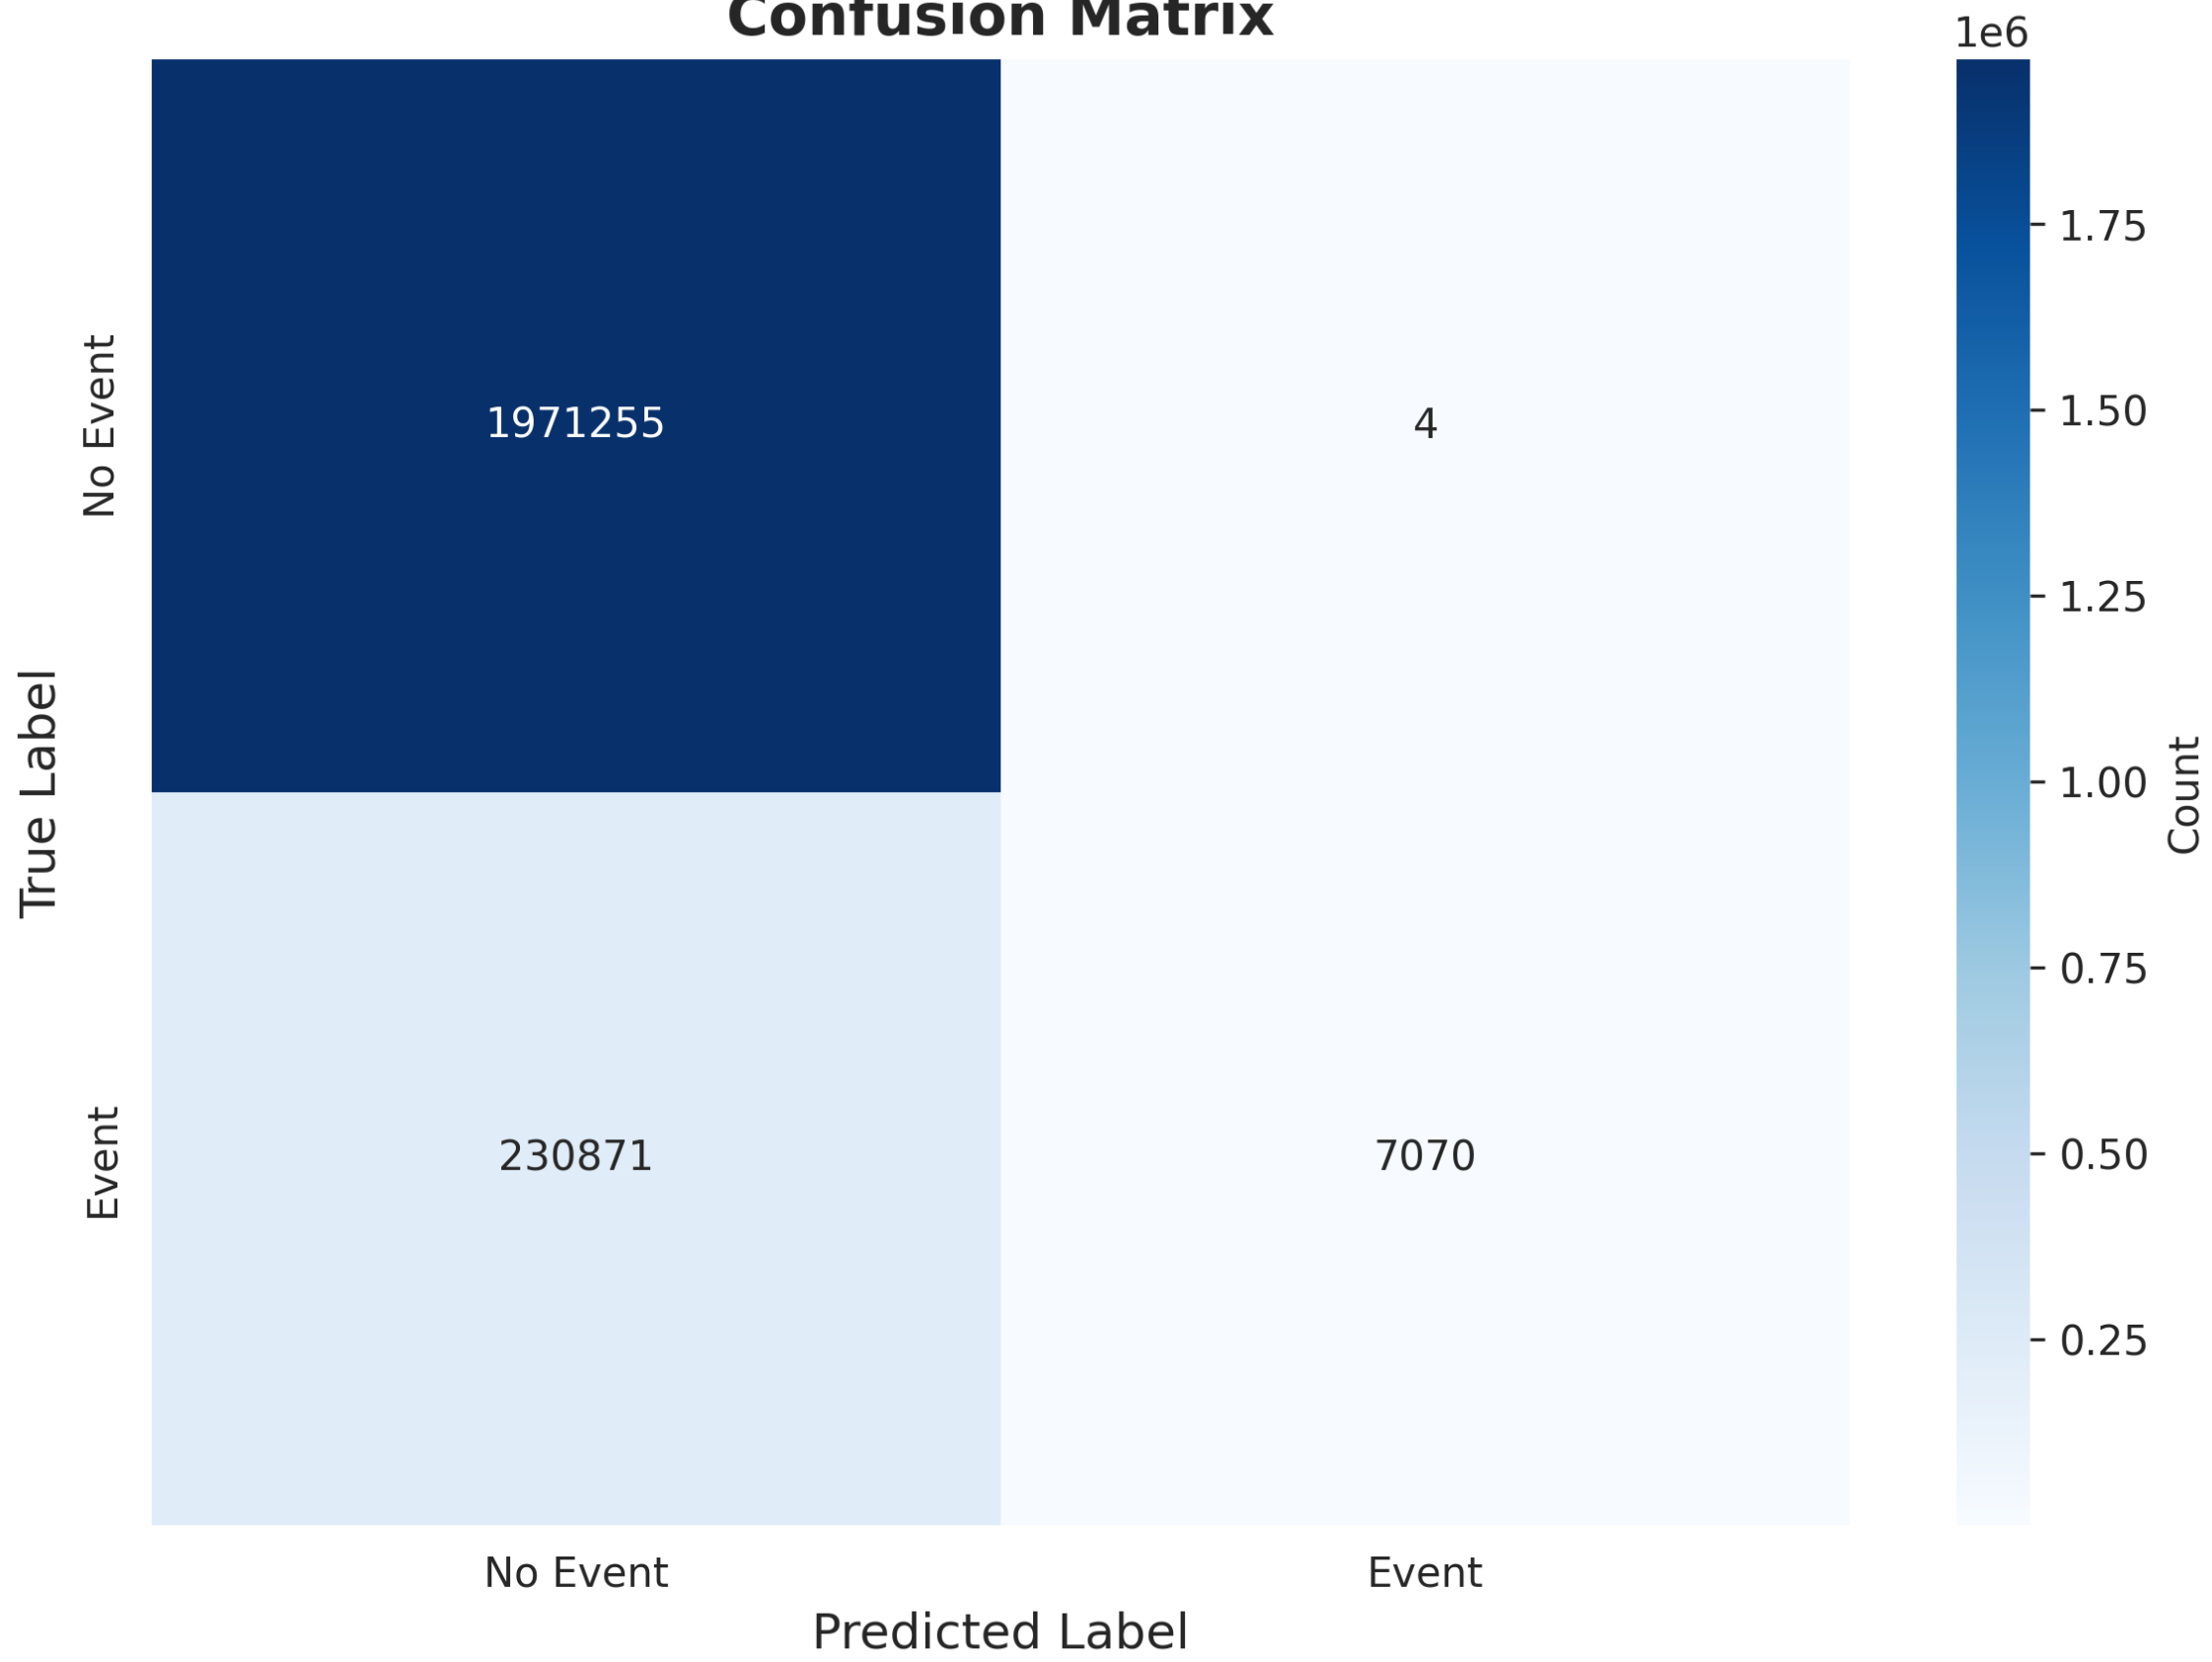
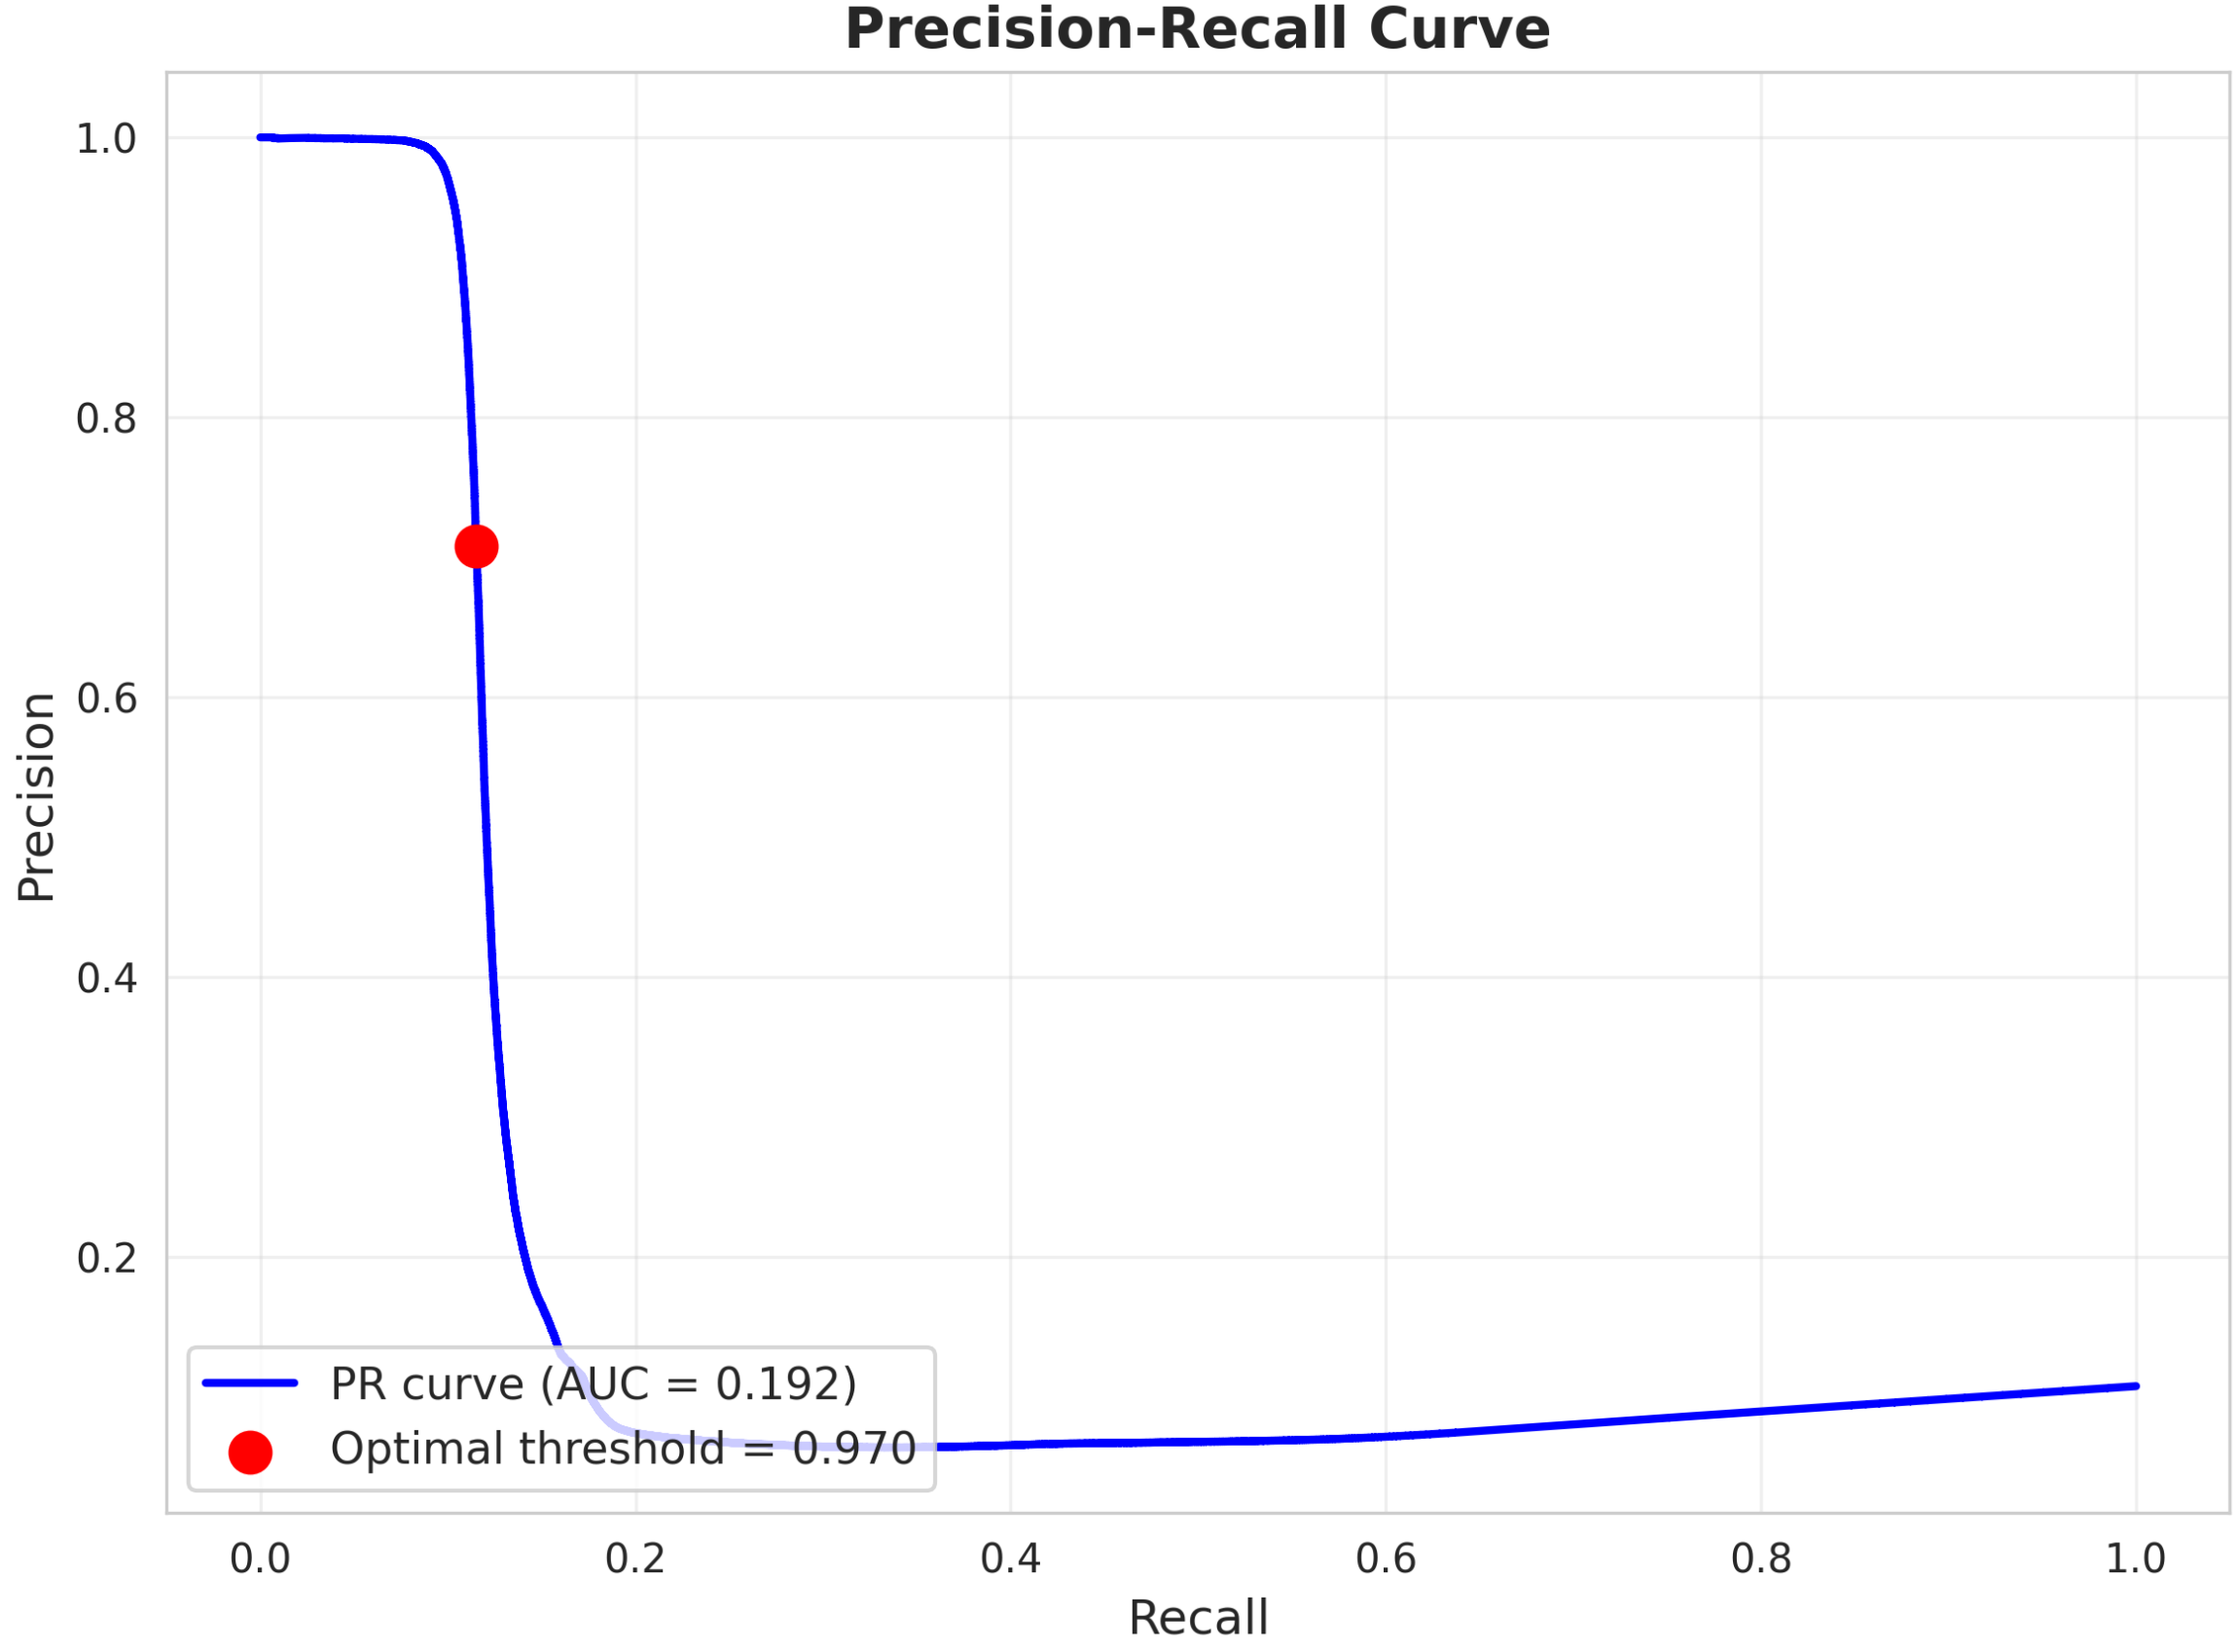
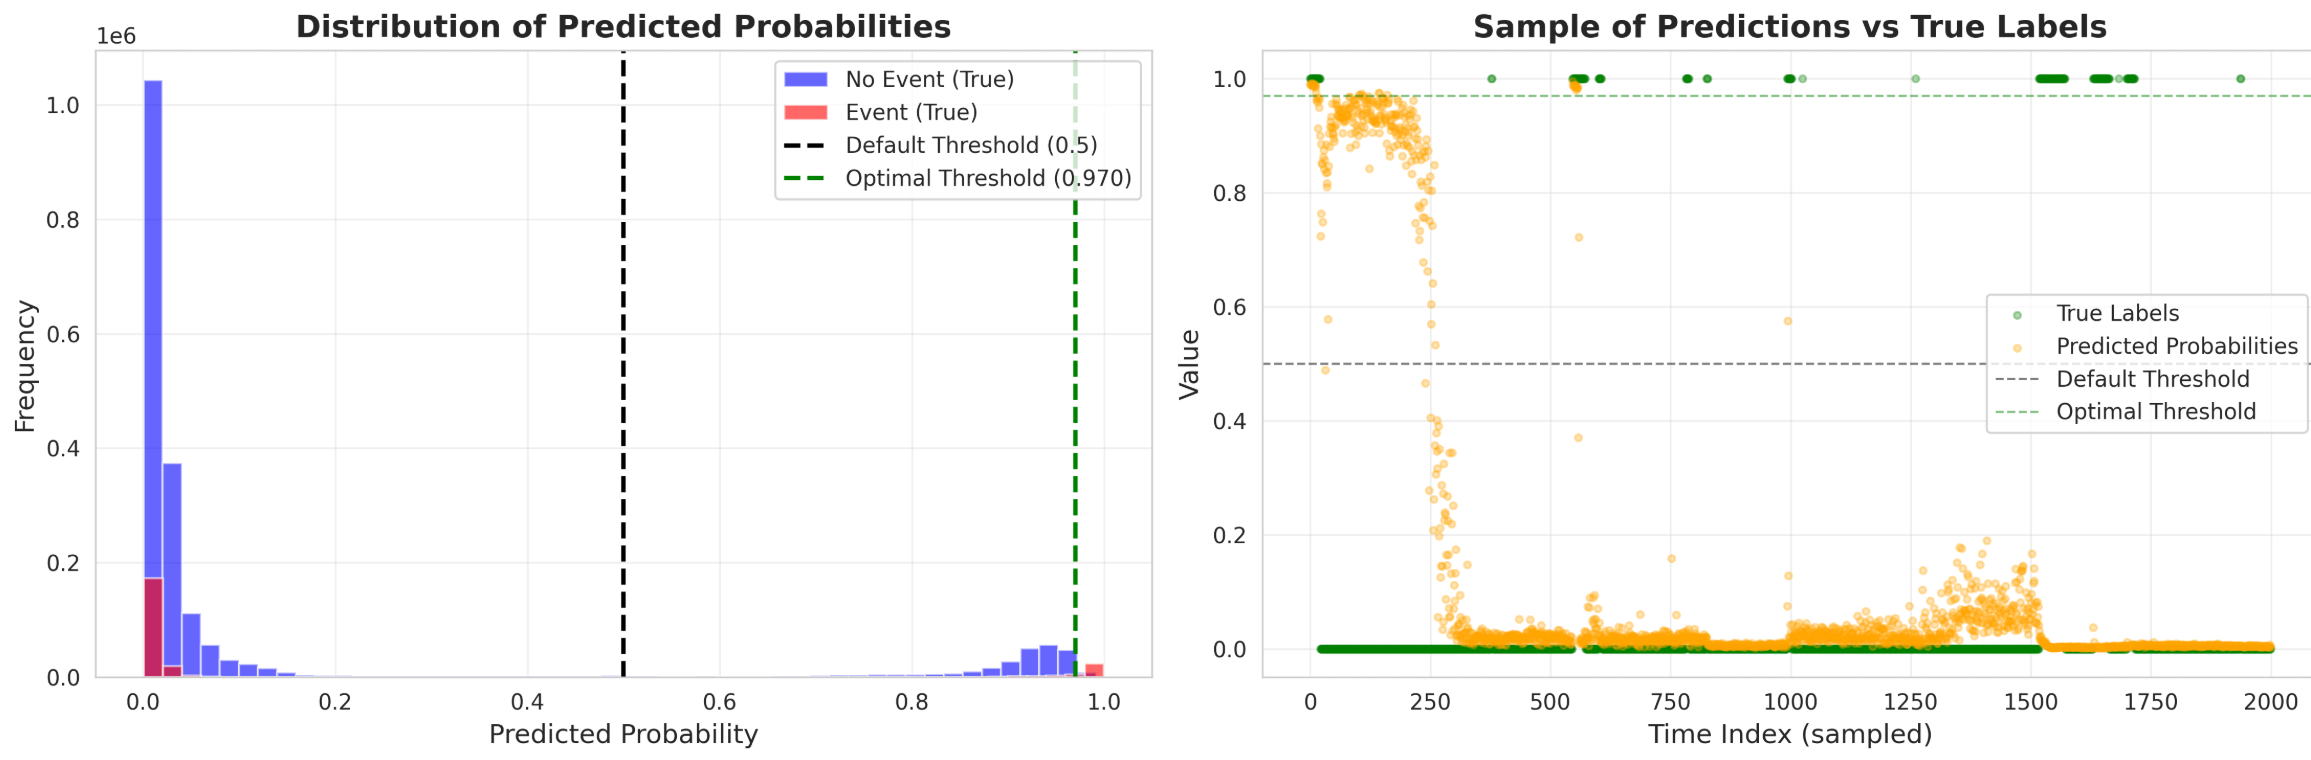
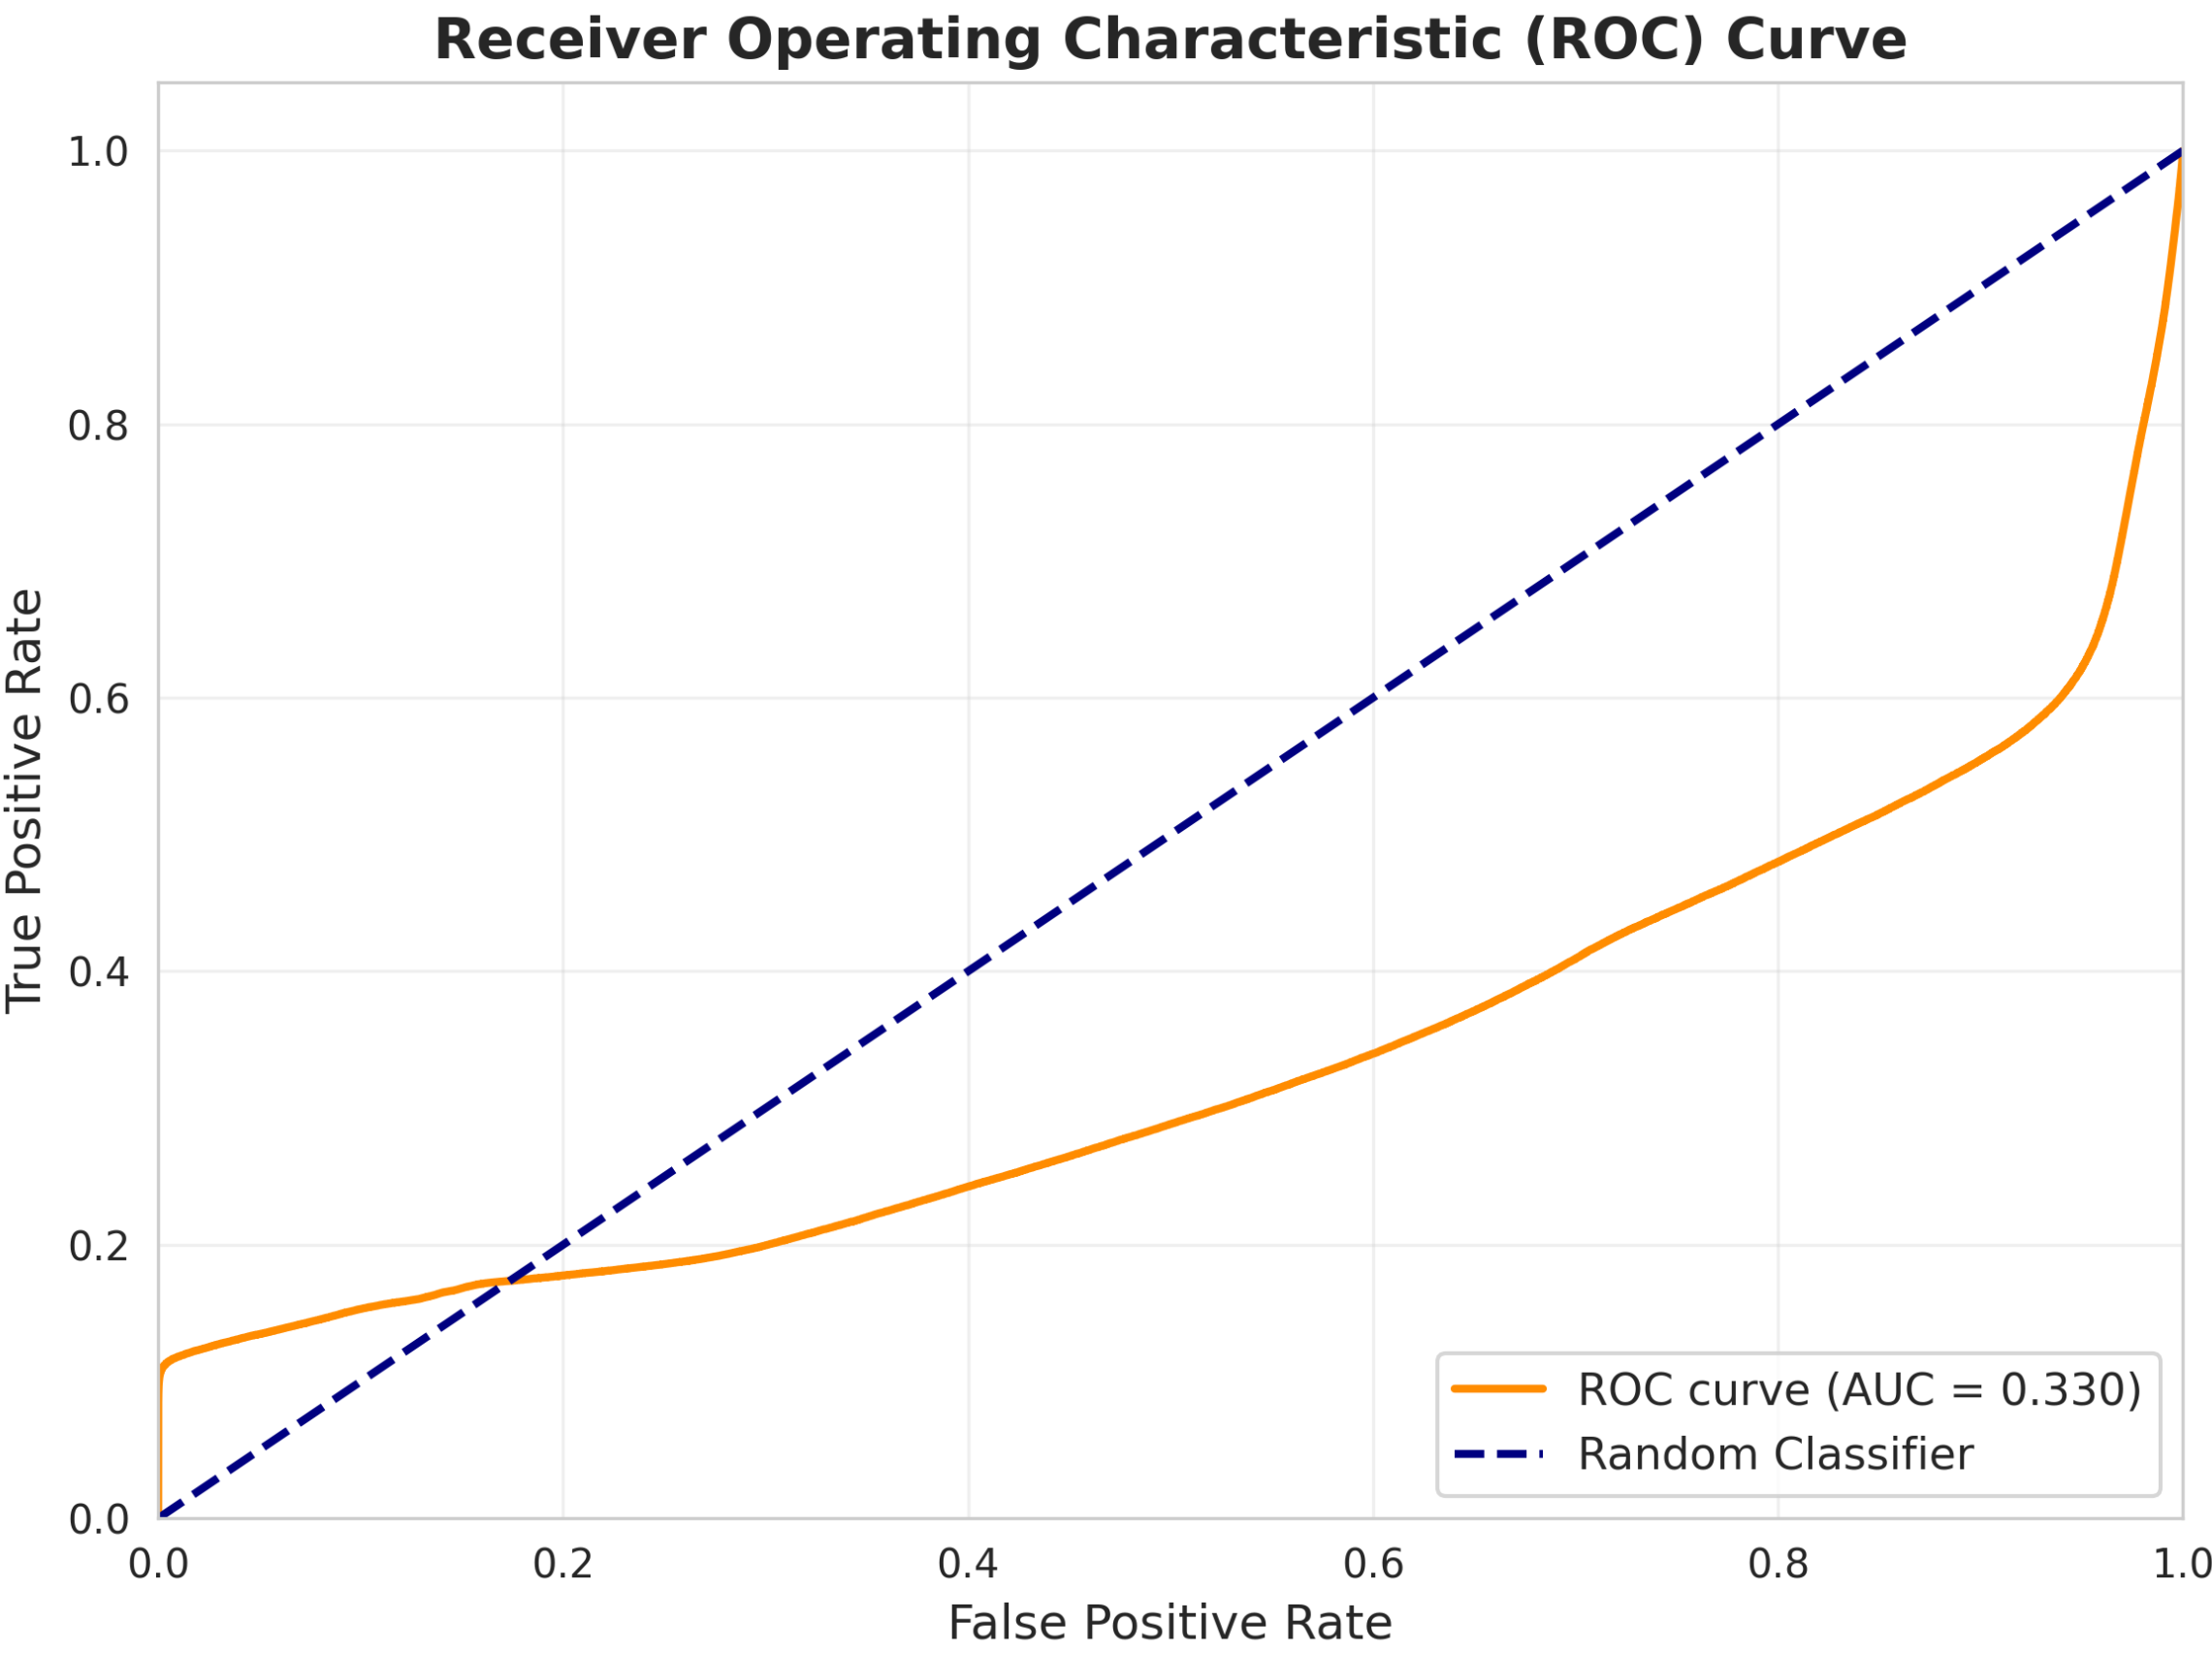
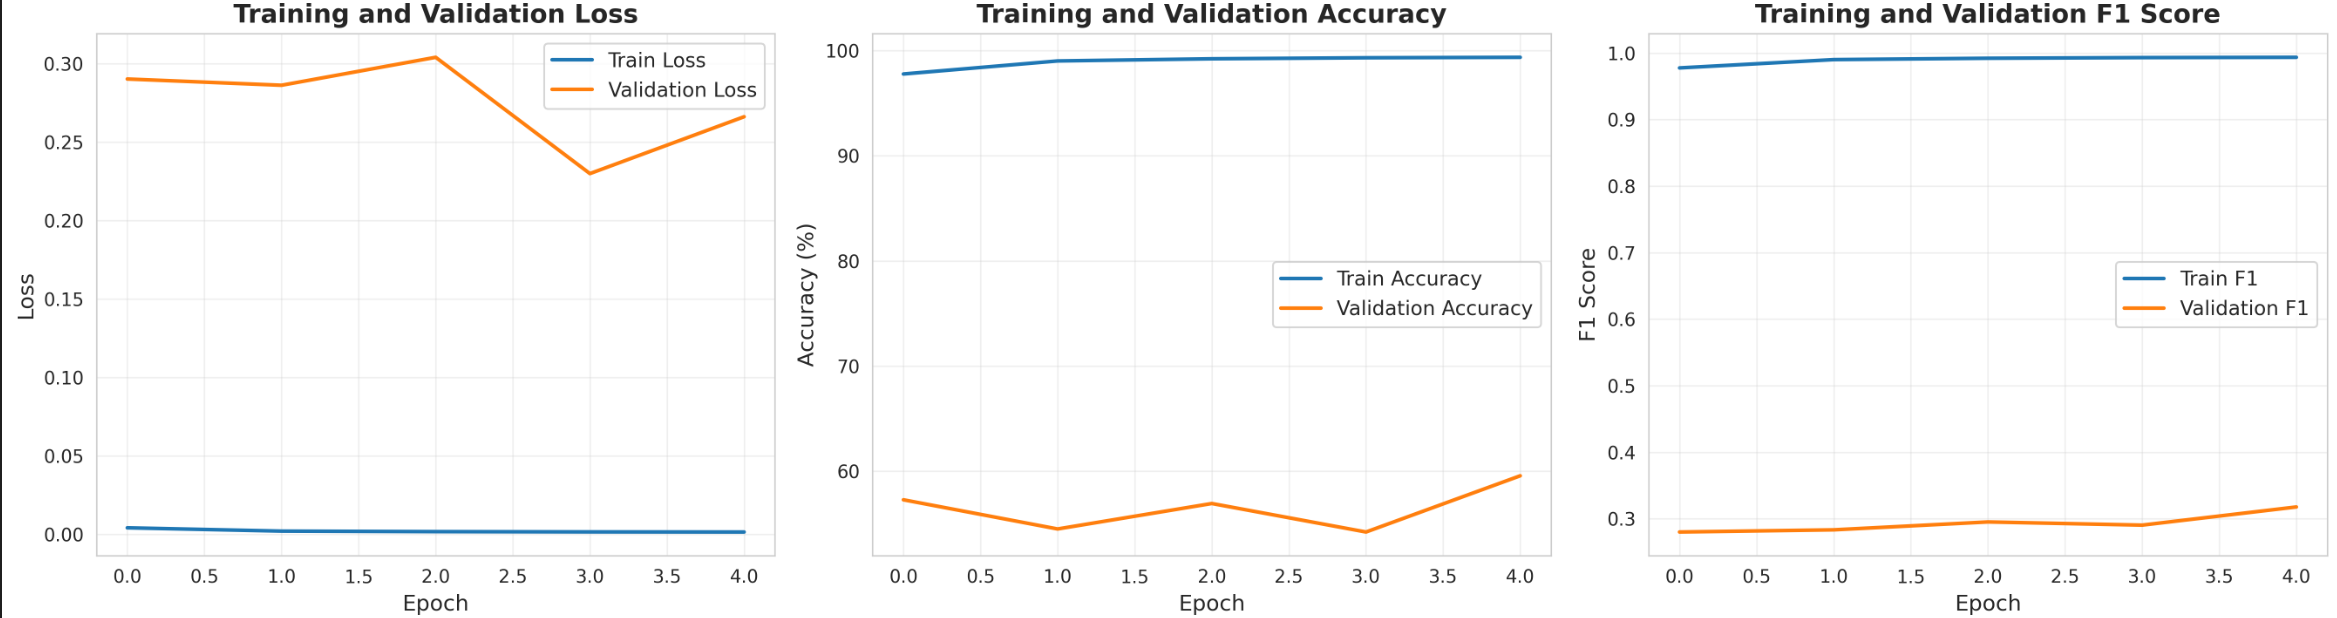

## Transformer